In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
df = pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

In [9]:
len(X_train)

1257

In [10]:
len(X_test)

540

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [38]:
knn.score(X_test, y_test)

0.9888888888888889

In [15]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 48]])

Text(58.222222222222214, 0.5, 'Truth')

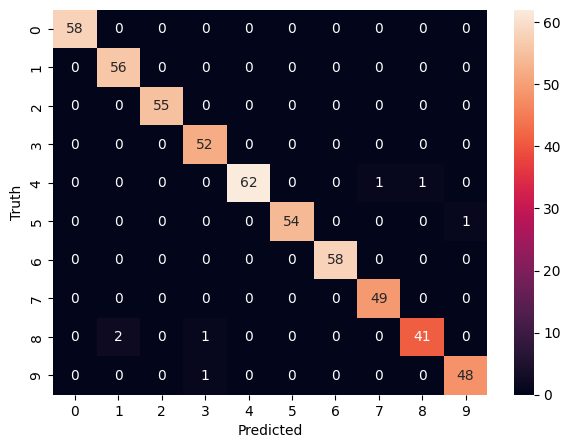

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        55
           3       0.96      1.00      0.98        52
           4       1.00      0.97      0.98        64
           5       1.00      0.98      0.99        55
           6       1.00      1.00      1.00        58
           7       0.98      1.00      0.99        49
           8       0.98      0.93      0.95        44
           9       0.98      0.98      0.98        49

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [44]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = [x for x in range(1, 10)]
metrics = ['euclidean', 'manhattan', 'chebyshev']
avg_scores = {}

for m in metrics:
    for n in n_neighbors:
        cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=n, metric=m), digits.data, digits.target, cv=5)
        avg_scores[f'{m}_{n}'] = np.average(cv_scores)

avg_scores

{'euclidean_1': np.float64(0.9643933766635715),
 'euclidean_2': np.float64(0.9671711544413494),
 'euclidean_3': np.float64(0.966621788919839),
 'euclidean_4': np.float64(0.9638409161250386),
 'euclidean_5': np.float64(0.9627282575054161),
 'euclidean_6': np.float64(0.9593856391210152),
 'euclidean_7': np.float64(0.9599458372021046),
 'euclidean_8': np.float64(0.9577205199628598),
 'euclidean_9': np.float64(0.9566109563602601),
 'manhattan_1': np.float64(0.9554967502321263),
 'manhattan_2': np.float64(0.9515970287836584),
 'manhattan_3': np.float64(0.9566078613432374),
 'manhattan_4': np.float64(0.9543732590529249),
 'manhattan_5': np.float64(0.953268337975859),
 'manhattan_6': np.float64(0.9510399257195914),
 'manhattan_7': np.float64(0.9543809965954813),
 'manhattan_8': np.float64(0.9515970287836583),
 'manhattan_9': np.float64(0.9560523057876817),
 'chebyshev_1': np.float64(0.943252862890746),
 'chebyshev_2': np.float64(0.9338037759207675),
 'chebyshev_3': np.float64(0.94492571959145

In [47]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(knn, {
    'n_neighbors': [x for x in range(1, 10)],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}, cv=5, return_train_score=False)
clf.fit(digits.data, digits.target)
clf.cv_results_


{'mean_fit_time': array([0.00161281, 0.00185809, 0.00118089, 0.00136347, 0.002914  ,
        0.00204568, 0.00153756, 0.00122528, 0.00138083, 0.00201201,
        0.00078359, 0.00093479, 0.0008678 , 0.00074625, 0.00107307,
        0.00077963, 0.00122638, 0.00113993, 0.00141611, 0.00091271,
        0.00206575, 0.00193243, 0.00097795, 0.00227394, 0.00128417,
        0.00094056, 0.00187812]),
 'std_fit_time': array([3.86708397e-04, 1.00698469e-03, 3.87159356e-04, 4.35750989e-04,
        2.91377067e-03, 7.79502541e-04, 1.06036048e-03, 2.74466673e-04,
        3.31985200e-04, 2.40500353e-03, 7.62448451e-05, 3.20355989e-04,
        2.33221069e-04, 5.69506084e-05, 3.64455639e-04, 1.58326812e-04,
        5.90787988e-04, 5.79592641e-04, 4.55658927e-04, 1.28878808e-04,
        2.04274566e-03, 4.95412866e-04, 1.59840368e-04, 1.96658493e-03,
        2.68473015e-04, 1.00253014e-04, 2.12465954e-03]),
 'mean_score_time': array([0.05179615, 0.03728418, 0.03668828, 0.0384367 , 0.03337231,
        0.037884

In [51]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001613,0.000387,0.051796,0.015334,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,3
1,0.001858,0.001007,0.037284,0.012515,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.961111,0.966667,0.969359,0.977716,0.961003,0.967171,0.006181,1
2,0.001181,0.000387,0.036688,0.012248,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,2
3,0.001363,0.000436,0.038437,0.010891,euclidean,4,"{'metric': 'euclidean', 'n_neighbors': 4}",0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,4
4,0.002914,0.002914,0.033372,0.007826,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,5
5,0.002046,0.000780,0.037884,0.007552,euclidean,6,"{'metric': 'euclidean', 'n_neighbors': 6}",0.944444,0.958333,0.966574,0.974930,0.952646,0.959386,0.010612,7
6,0.001538,0.001060,0.032159,0.013096,euclidean,7,"{'metric': 'euclidean', 'n_neighbors': 7}",0.936111,0.961111,0.969359,0.980501,0.952646,0.959946,0.015059,6
7,0.001225,0.000274,0.033958,0.010587,euclidean,8,"{'metric': 'euclidean', 'n_neighbors': 8}",0.936111,0.955556,0.969359,0.977716,0.949861,0.957721,0.014620,8
8,0.001381,0.000332,0.035454,0.009836,euclidean,9,"{'metric': 'euclidean', 'n_neighbors': 9}",0.930556,0.952778,0.972145,0.977716,0.949861,0.956611,0.016887,9
9,0.002012,0.002405,0.028948,0.010117,manhattan,1,"{'metric': 'manhattan', 'n_neighbors': 1}",0.950000,0.933333,0.963788,0.986072,0.944290,0.955497,0.018169,12


In [54]:
df[['param_metric','param_n_neighbors','mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,euclidean,1,0.964393
1,euclidean,2,0.967171
2,euclidean,3,0.966622
3,euclidean,4,0.963841
4,euclidean,5,0.962728
5,euclidean,6,0.959386
6,euclidean,7,0.959946
7,euclidean,8,0.957721
8,euclidean,9,0.956611
9,manhattan,1,0.955497
